In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences , dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i , sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16 , activation = 'relu' , input_shape = (10000,)))
model.add(layers.Dense(16 , activation = 'relu'))
model.add(layers.Dense(1 , activation = 'sigmoid'))


In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [6]:
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])

history = model.fit(partial_x_train , partial_y_train , epochs = 3 , batch_size = 512 ,
                    validation_data = (x_val , y_val))



Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 2s 127us/step - loss: 0.5243 - acc: 0.7977 - val_loss: 0.4097 - val_acc: 0.8537
Epoch 2/3
15000/15000 [==============================] - 1s 88us/step - loss: 0.3209 - acc: 0.9007 - val_loss: 0.3277 - val_acc: 0.8767
Epoch 3/3
15000/15000 [==============================] - 1s 96us/step - loss: 0.2366 - acc: 0.9250 - val_loss: 0.3115 - val_acc: 0.8746


In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

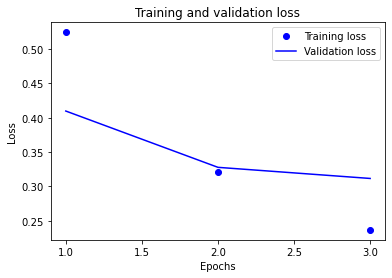

In [8]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , loss_values , 'bo' , label = 'Training loss' )
plt.plot(epochs , val_loss_values , 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.show()


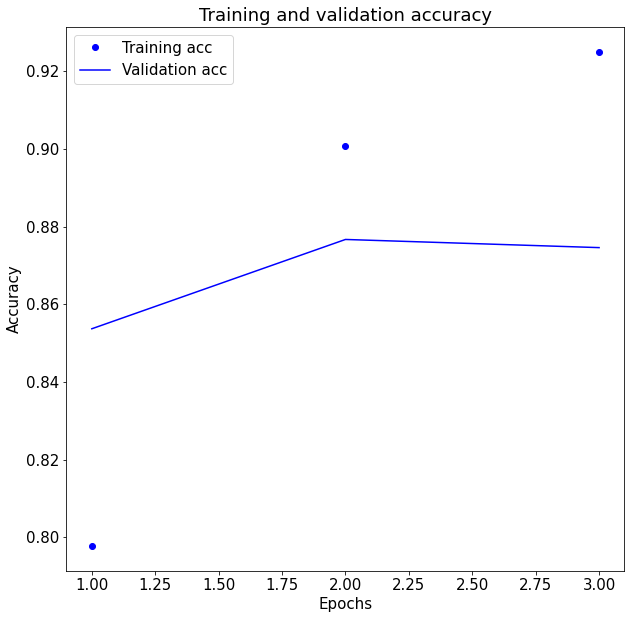

In [9]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.show()

In [10]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 65us/step


[0.33427484802246094, 0.8626800179481506]

In [11]:
model.predict(x_test)

array([[0.30252612],
       [0.9941702 ],
       [0.6272585 ],
       ...,
       [0.08691154],
       [0.13425986],
       [0.36122543]], dtype=float32)